In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

td=pd.read_csv('/train (3).csv')

td.head()

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0


*DATA PREPROCESSING  *

In [ ]:
td.shape

(3467, 20)

This shows that our data comprises of 3467 observations and 20 fields.

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              3467 non-null   object 
 1   Account_Length_Months   3467 non-null   int64  
 2   Area_Code               3467 non-null   int64  
 3   Intl_Plan               3467 non-null   int64  
 4   VM_Plan                 3467 non-null   int64  
 5   VM_Messages             3467 non-null   int64  
 6   Avg_Day_Minutes         3467 non-null   float64
 7   Avg_Day_Calls           3467 non-null   int64  
 8   Avg_Day_Charge          3467 non-null   float64
 9   Avg_Eve_Minutes         3467 non-null   float64
 10  Avg_Eve_Calls           3467 non-null   int64  
 11  Avg_Eve_Charge          3467 non-null   float64
 12  Avg_Night_Minutes       3467 non-null   float64
 13  Avg_Night_Calls         3467 non-null   int64  
 14  Avg_Night_Charge        3467 non-null   

In [ ]:
td.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,100.606288,436.620710,0.096048,0.262475,7.695991,195.642440,105.970003,36.037067,214.303825,105.993078,25.049262,203.181030,105.335449,10.162132,11.790730,4.827517,3.076752,1.571676,0.143640
std,39.841338,42.021174,0.294700,0.440043,13.509946,58.679758,21.163917,10.808548,53.649726,21.014681,6.270818,50.799019,21.255113,2.540708,3.186702,2.894911,0.831318,1.318664,0.350775
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.680000,13.000000,5.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,154.810000,92.000000,28.510000,178.620000,92.000000,20.880000,169.570000,91.000000,8.480000,9.780000,3.000000,2.560000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,195.780000,106.000000,36.070000,214.310000,106.000000,25.050000,203.750000,106.000000,10.190000,11.960000,4.000000,3.120000,1.000000,0.000000
75%,127.000000,415.000000,0.000000,1.000000,17.000000,234.540000,120.000000,43.200000,250.310000,121.000000,29.260000,237.570000,119.000000,11.880000,13.800000,7.000000,3.600000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,52.000000,380.000000,175.000000,70.000000,376.750000,180.000000,44.040000,400.000000,185.000000,20.000000,23.000000,22.000000,6.000000,9.000000,1.000000


# **GENERAL INFORMATION ABOUT CUSTOMERS **

At first we plot the heat map of all the data which gives us the correlations between the fields and helps us to drop the fields that are not useful for futher data analytics.

<Axes: >

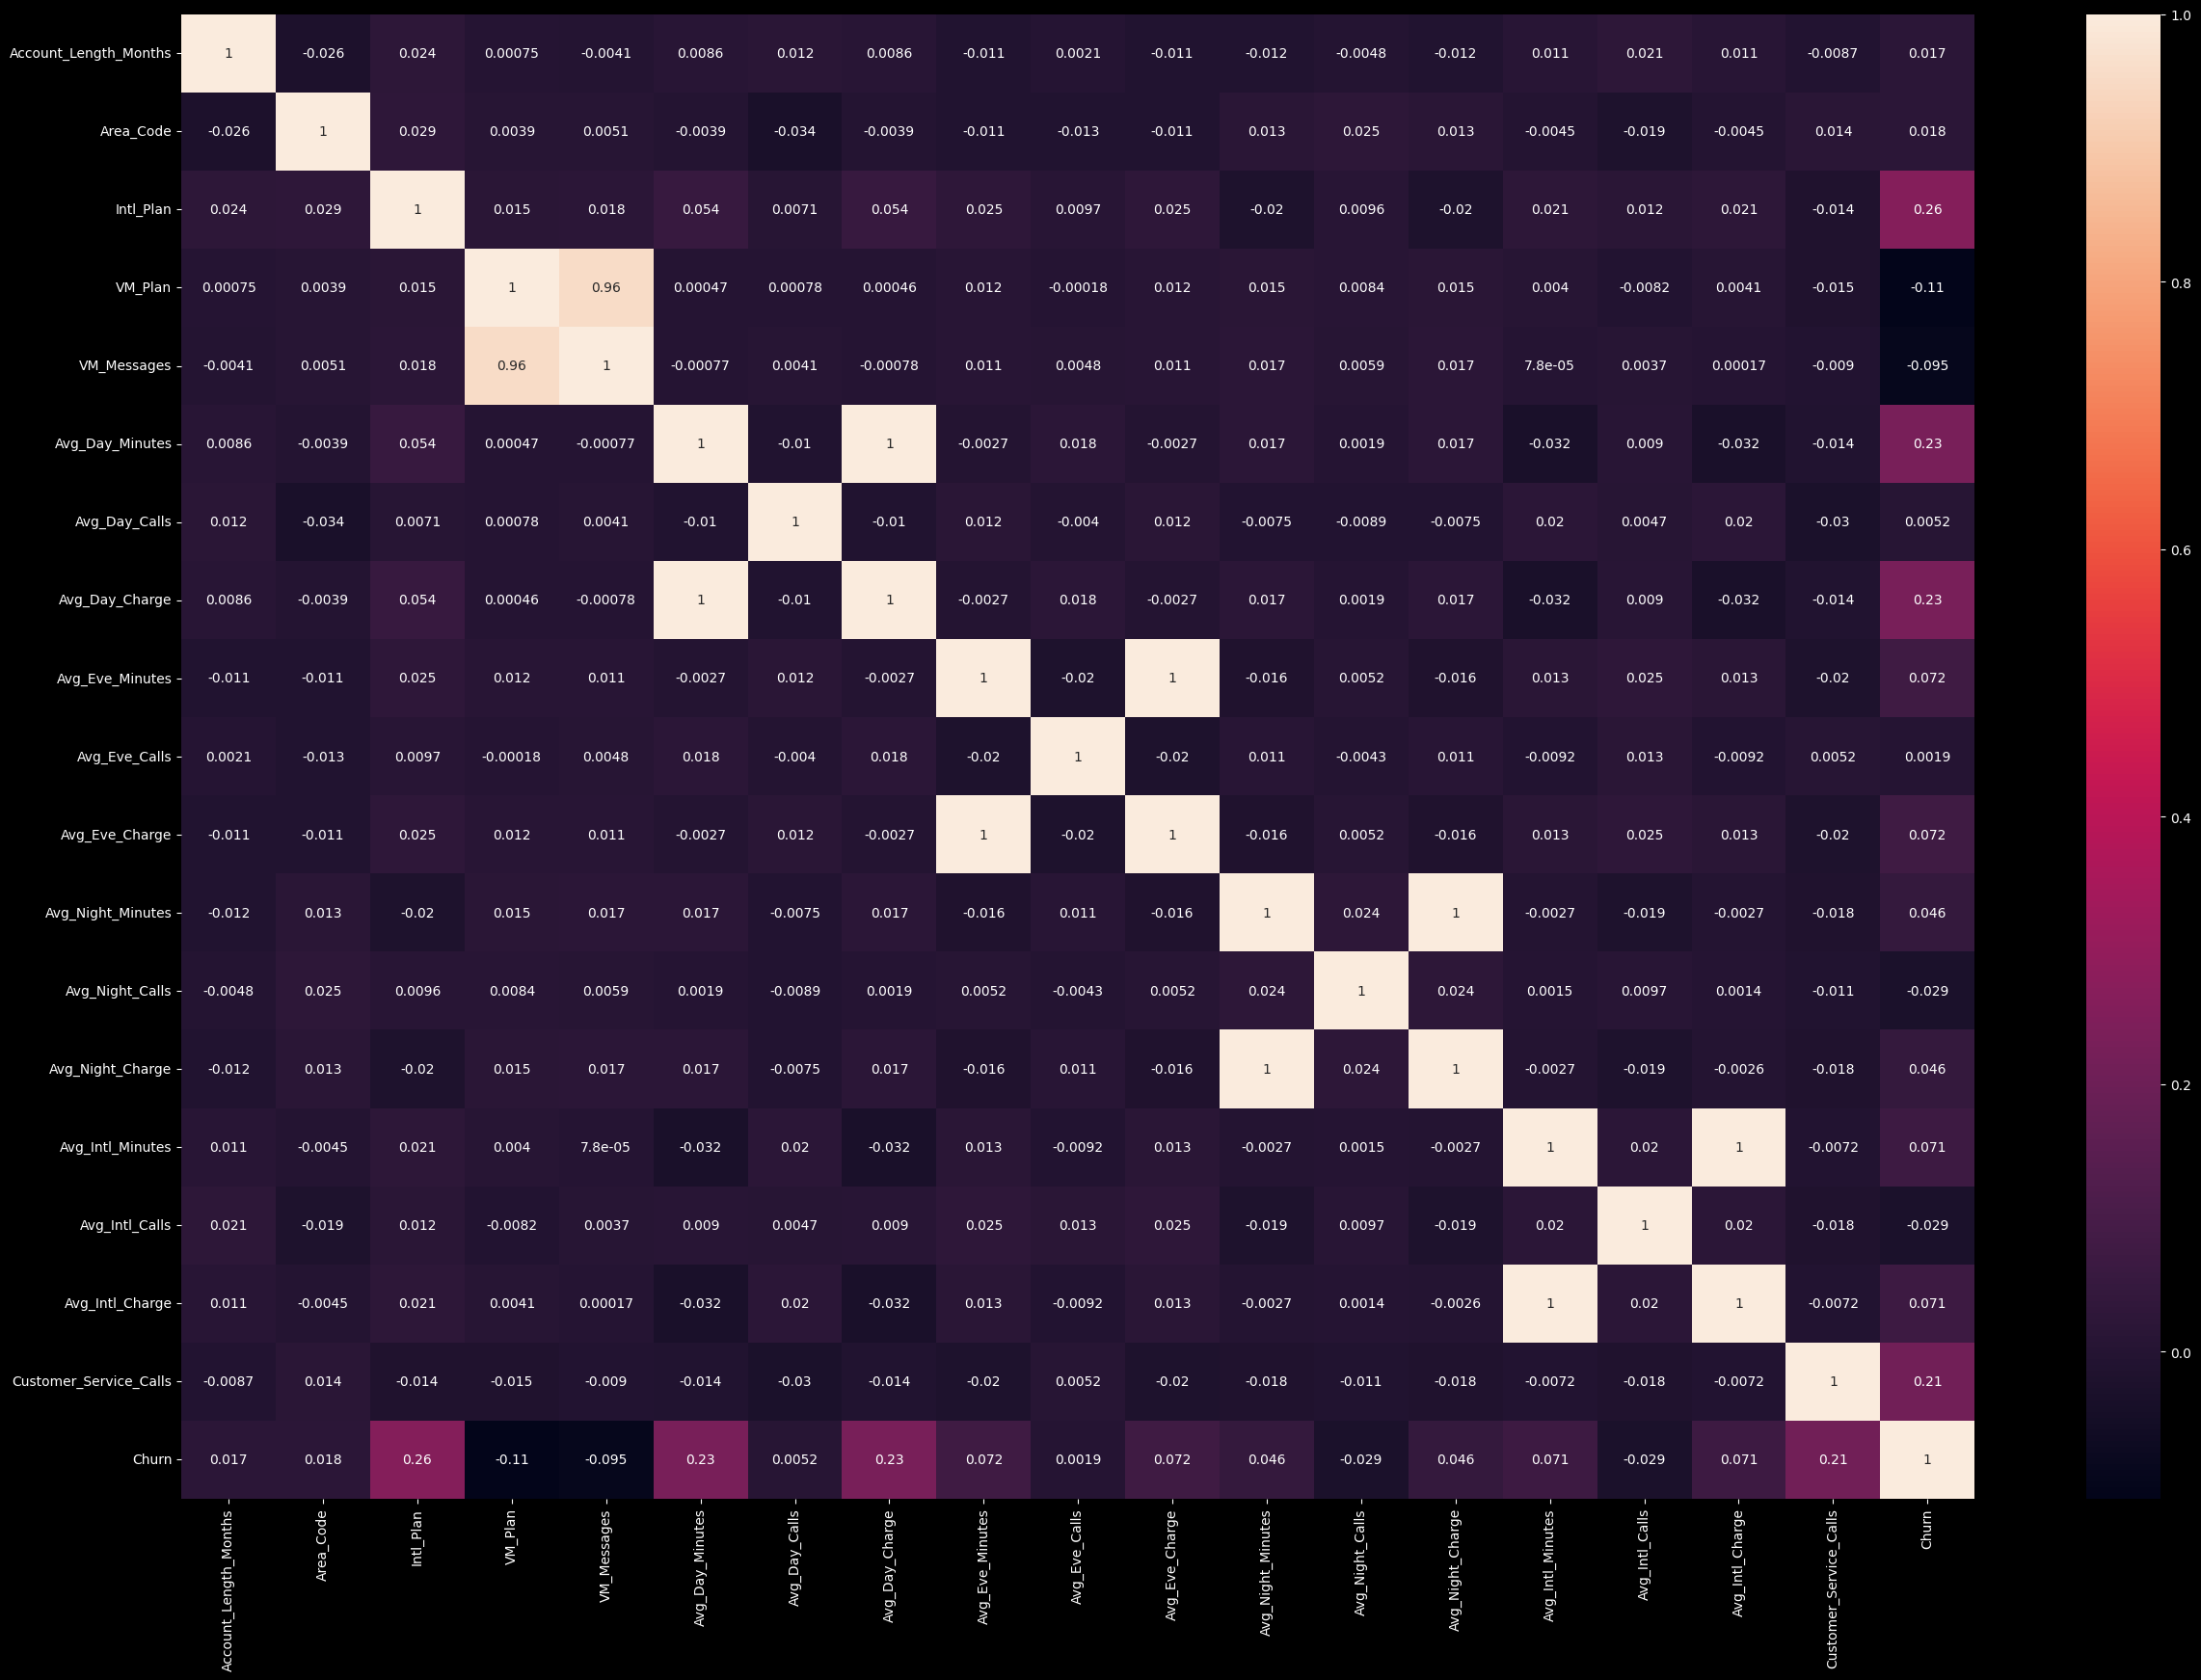

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(td.drop(columns='State_Code').corr(),annot=True)

As we can see that Avg_Day_Calls and Avg_Eve_Calls are not related to the curn rate of the people and also these values can be used from the minutes columns it is better to drop these columns before proceeding further.

What else we infer from the heat map:

*   Churn is directly proportional to Int_Plan whereas VM_Plan is inversely proportional to the churn rate.
*   Avg_Day_Minutes and charges are also directly proportional to the churn rate
*   Customer_Service_Calls also support the increase in Churn rate.





In [ ]:
df.drop(['Avg_Day_Calls','Avg_Eve_Calls'], axis=1, inplace=True)

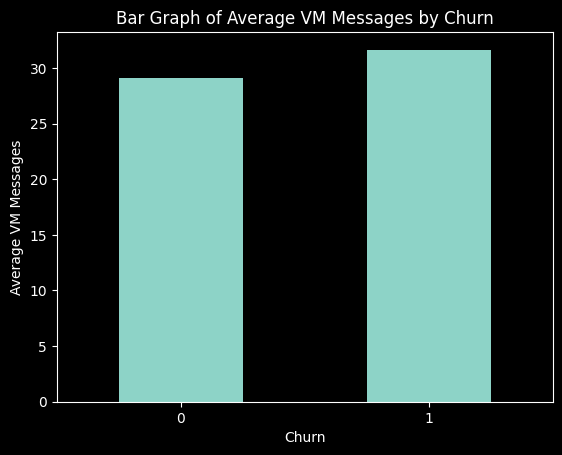

In [ ]:
avgvm=(td[td.VM_Plan>0]).groupby('Churn').apply(lambda group: pd.Series({
    'avg_vm': group['VM_Messages'].mean()
})).reset_index()
avgvm.plot(kind='bar', x='Churn', y='avg_vm', legend=False, rot=0)


plt.xlabel('Churn')
plt.ylabel('Average VM Messages')
plt.title('Bar Graph of Average VM Messages by Churn')
plt.show()


:As VM_Messages for both churning and non churning users are almost same we might drop the column "VM_Messages" for further data anylysis.

In [ ]:
td.drop('VM_Messages', axis=1, inplace=True)


# DISTRIBUTION BY AREA CODE


<Axes: ylabel='Area_Code'>

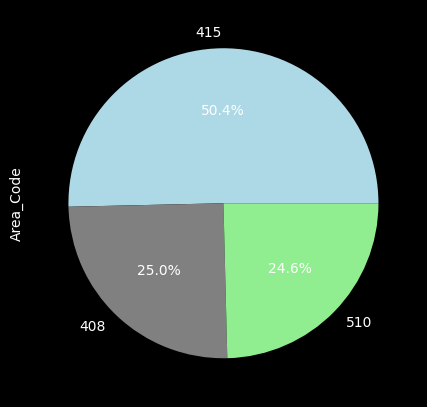

In [ ]:
td['Area_Code'].value_counts().plot(kind="pie",colors=["lightblue","grey","lightgreen"],figsize=(5,6),autopct='%1.1f%%')

## DISTRIBUTION BY STATE CODE

<Axes: xlabel='count', ylabel='State_Code'>

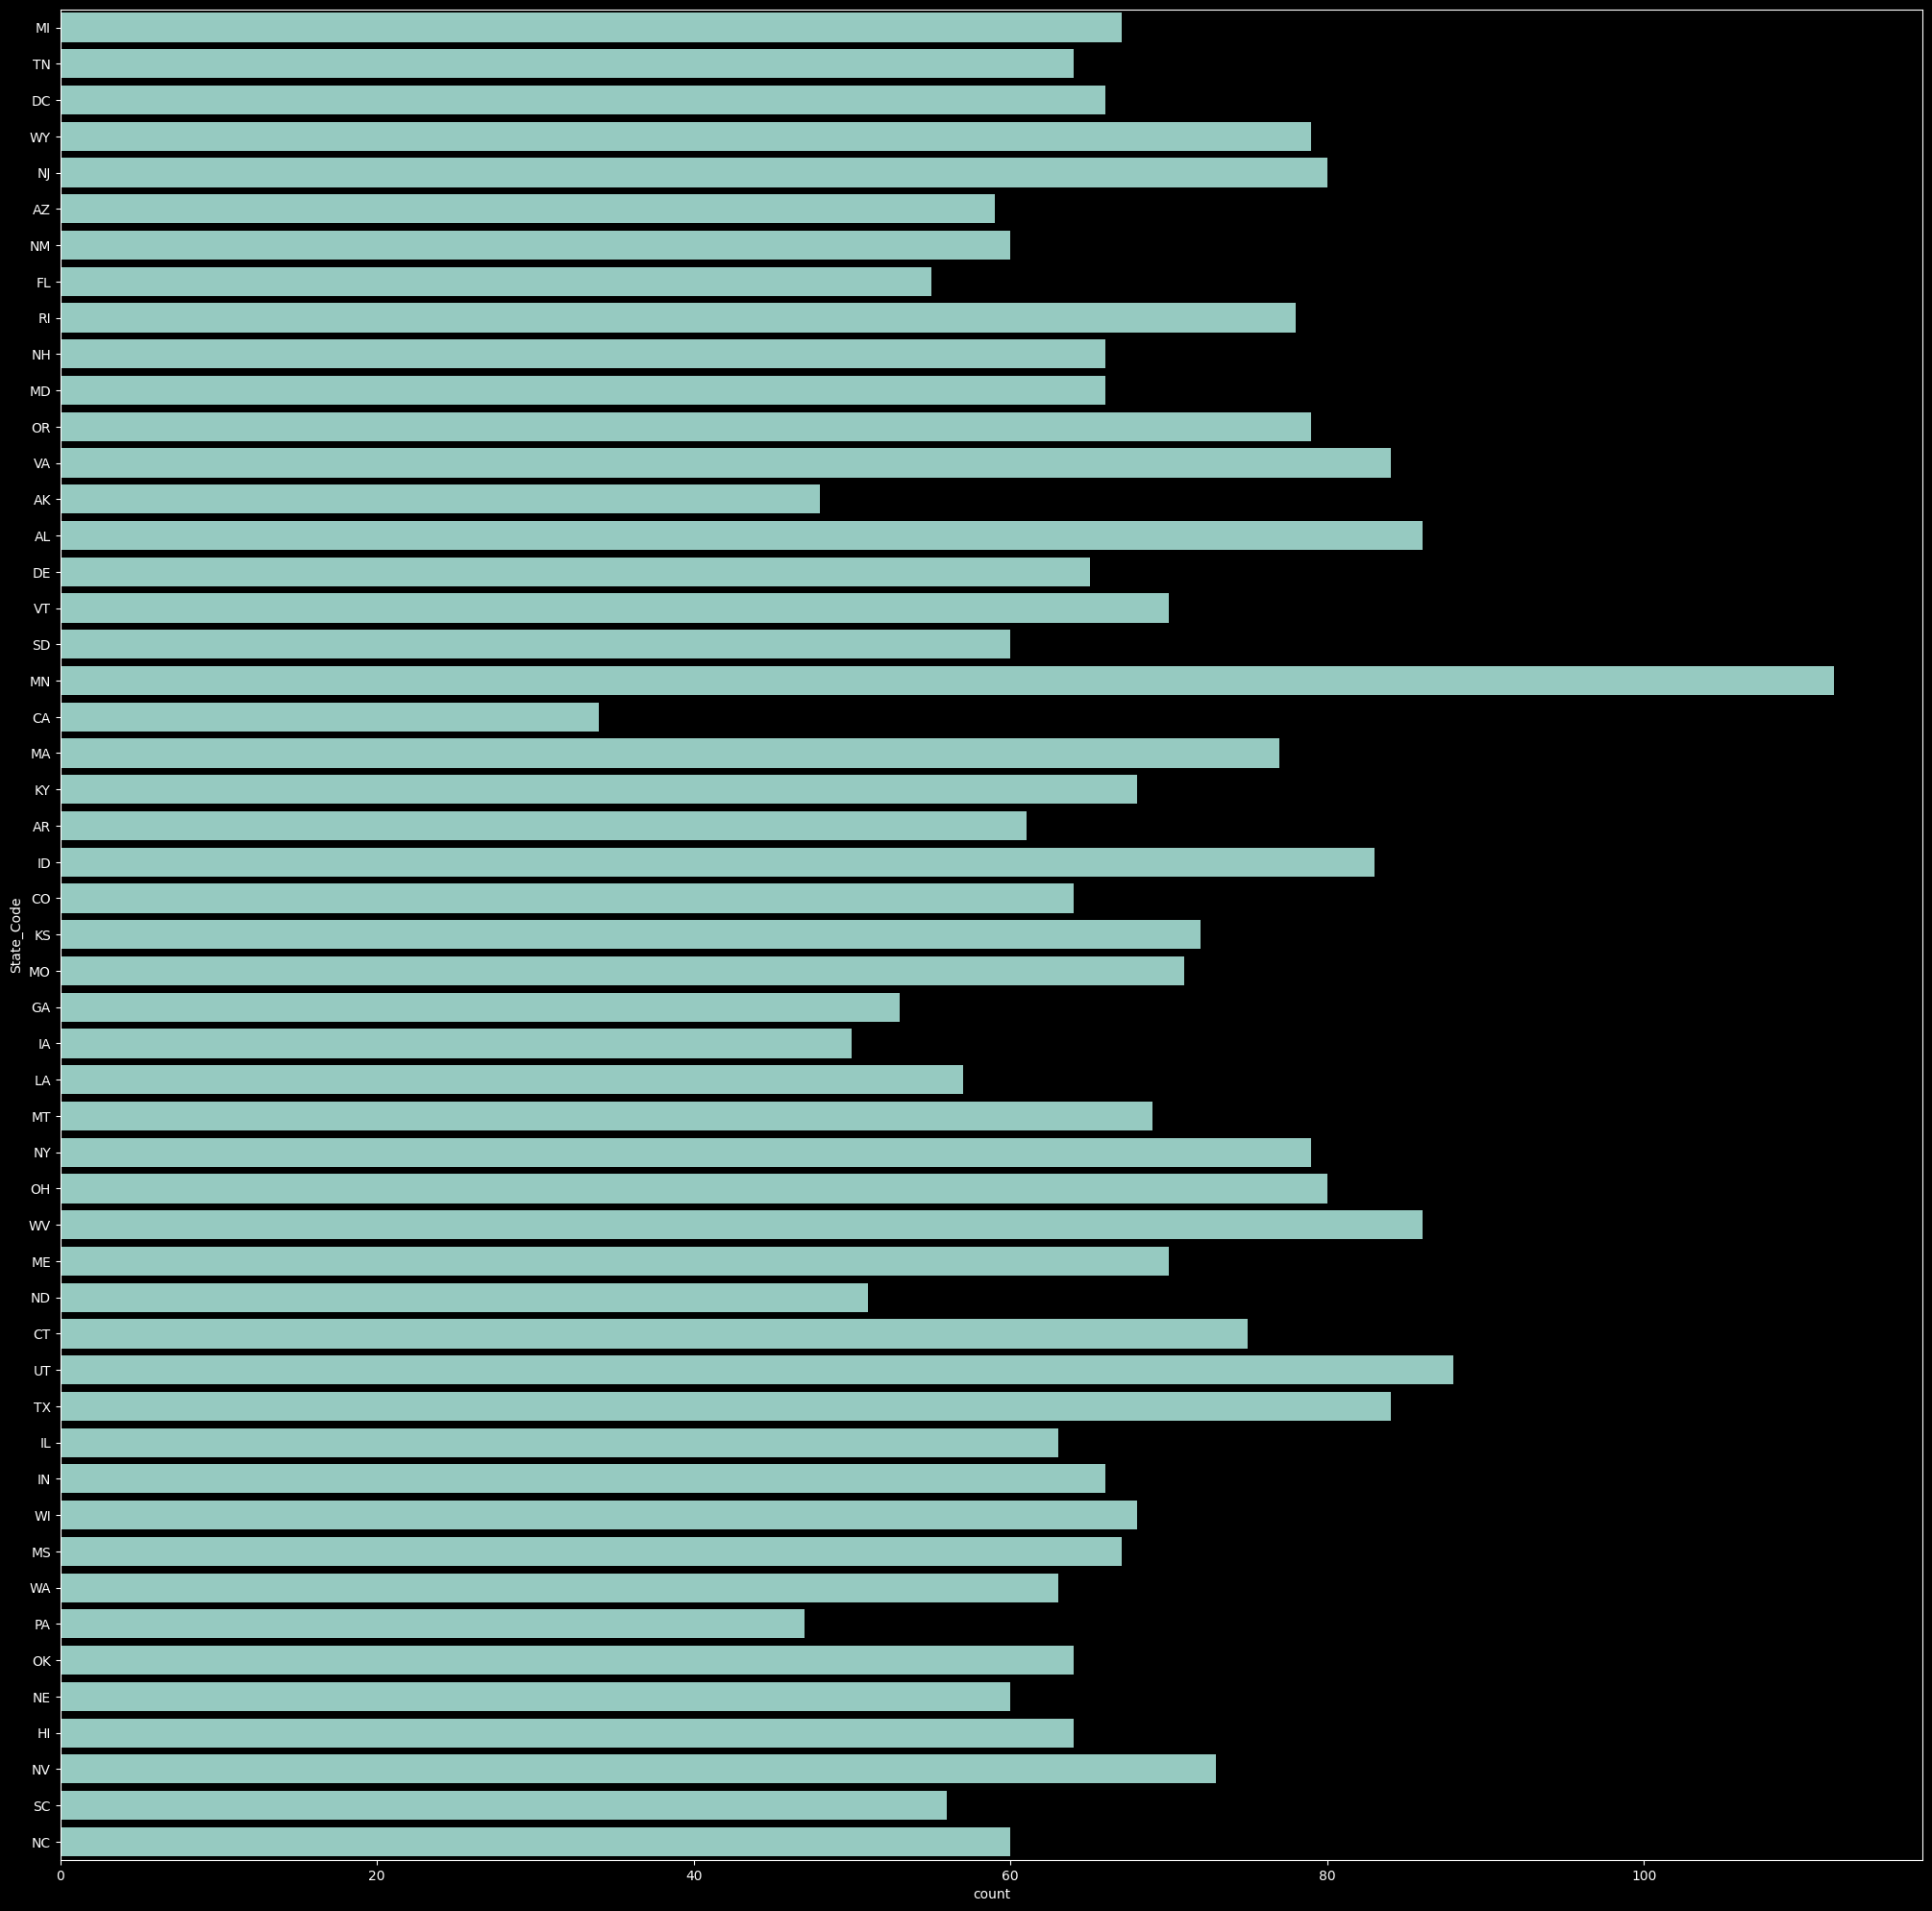

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.style.use("dark_background")
sns.countplot(y="State_Code", data=td,dodge=True, ax=ax)


# Declaring dataframes that will be used in the anylysis


In [ ]:
tc=td[td.Churn>0]               #df which contains data of people churning
tnc=td[td.Churn==0]             #df which contains data of people not churning
tvm=td[td.VM_Plan>0]            #df which contains data of people with VM_Plan
tint=td[td.Intl_Plan>0]         #df which contains data of people with Intl_Plan

td['total_mins'] = td.Avg_Day_Minutes + td.Avg_Eve_Minutes + td.Avg_Night_Minutes
td['tms'] = td.Avg_Day_Charge + td.Avg_Eve_Charge + td.Avg_Night_Charge

(array([[ 12.,  33.,  67., 113., 129.,  77.,  42.,  17.,   5.,   3.],
        [ 86., 204., 480., 660., 653., 521., 235., 100.,  23.,   7.]]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 2 BarContainer objects>)

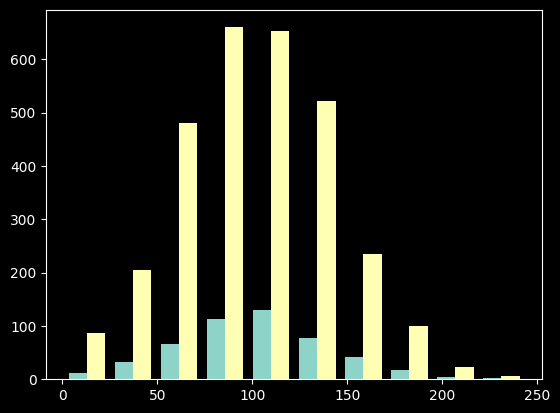

In [ ]:
a=tc.Account_Length_Months
b=tnc.Account_Length_Months
plt.hist([a,b])

Text(0, 0.5, 'VM Percent')

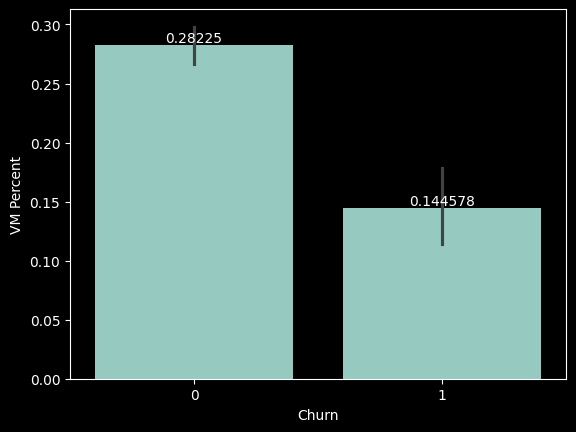

In [ ]:
ax=sns.barplot(x='Churn',y='VM_Plan',data=td,estimator='mean',linewidth=0)
ax.bar_label(ax.containers[0])
plt.ylabel('VM Percent')

This shows that VM_Plan is quite good as people having VM_Plan are less likely to Churn that people not having VM_Plan

Text(0, 0.5, 'Churn Percent')

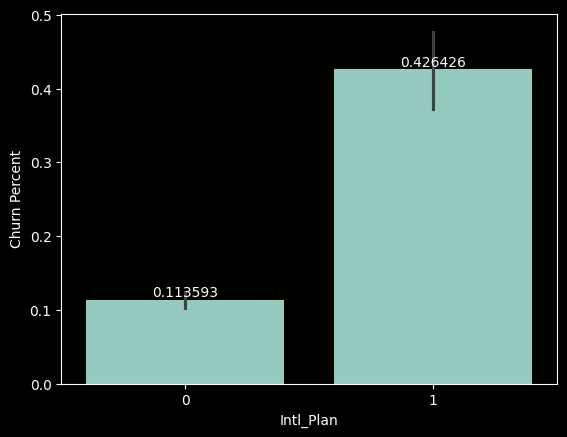

In [ ]:
ax=sns.barplot(x='Intl_Plan',y='Churn',data=td,estimator='mean',linewidth=0)
ax.bar_label(ax.containers[0])
plt.ylabel('Churn Percent')

Intl Plan is not beneficial for the company.

# Account length months vs Churn

[Text(0, 0, '100.333'), Text(0, 0, '102.237')]

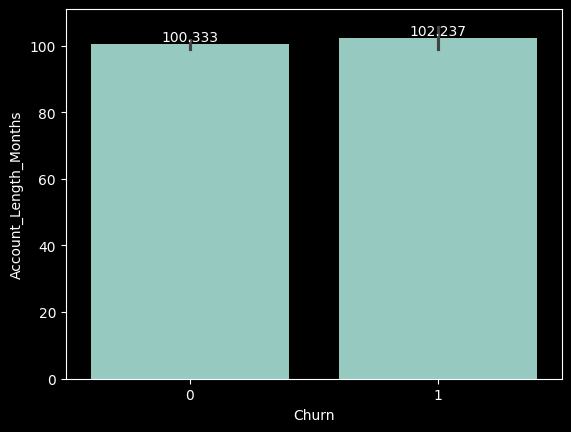

In [ ]:
ax=sns.barplot(x='Churn',y='Account_Length_Months',data=td,estimator='mean',linewidth=0)
ax.bar_label(ax.containers[0])

On avg the customers which churn are in company for 2 more months but no solid result can be derived from this information


<ipython-input-21-0dc32156f262>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l.append(td[td.Account_Length_Months>i][td.Account_Length_Months<i+10].Churn.mean())


Text(0.5, 0, 'Account length months')

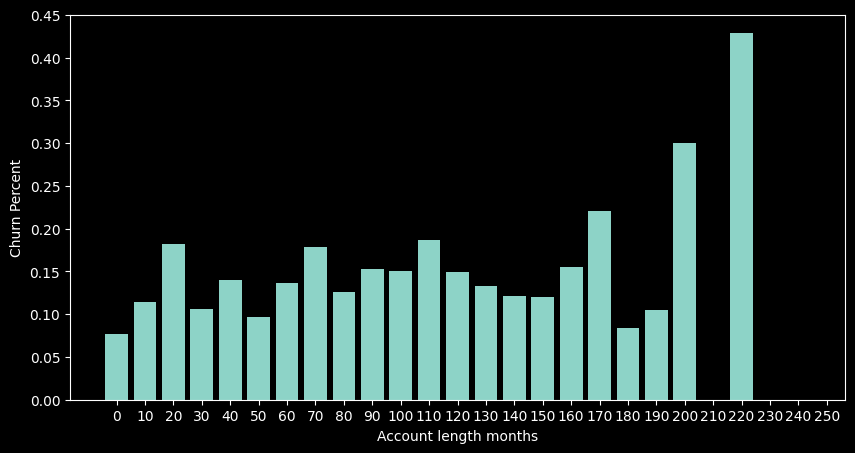

In [ ]:
l=[]
for i in range(0,260,10):
    l.append(td[td.Account_Length_Months>i][td.Account_Length_Months<i+10].Churn.mean())
plt.figure(figsize=(10,5))
plt.bar(np.arange(0,260,10), l, width=8)
plt.xticks(np.arange(0,260,10))
plt.ylabel('Churn Percent')
plt.xlabel('Account length months')

Increase in account length months supports the increase in churn percent.

## Total Minutes vs Churn

<ipython-input-22-e01768c6ae70>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l.append(td[td.total_mins>=i][td.total_mins<i+20].Churn.mean())


Text(0.5, 0, 'total minutes spent in a day')

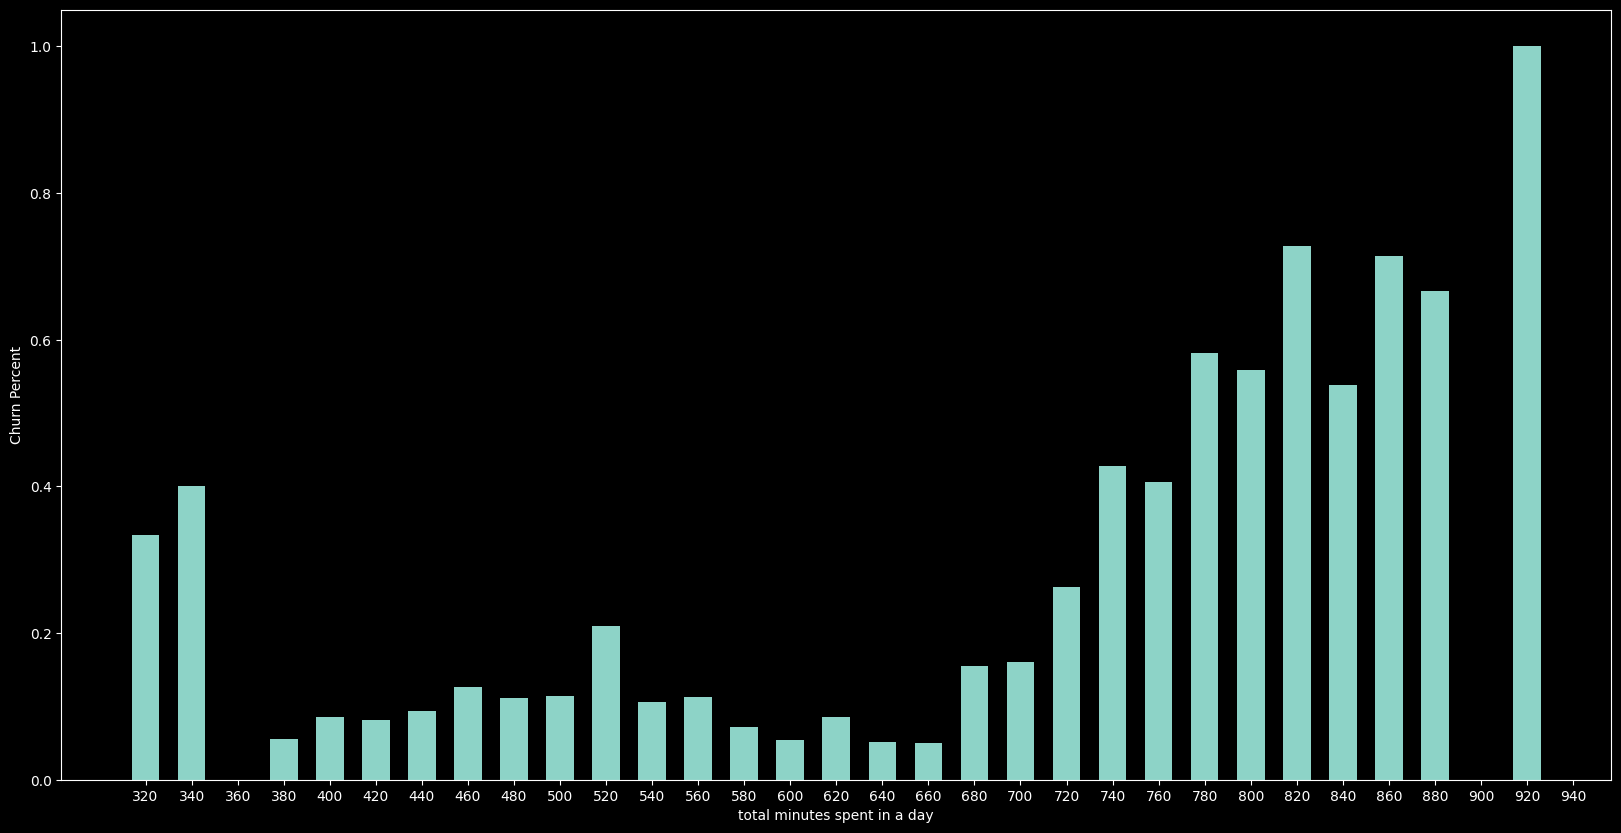

In [ ]:
l=[]
for i in range(320,950,20):
    l.append(td[td.total_mins>=i][td.total_mins<i+20].Churn.mean())
plt.figure(figsize=(20,10))
plt.bar(np.arange(320,960,20), l, width=12)
plt.xticks(np.arange(320,960,20))
plt.ylabel('Churn Percent')
plt.xlabel('total minutes spent in a day')

Total time spent also directly relates to churn.

## Day Minutes vs Churn

<ipython-input-23-f53f295b8579>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l.append(td[td.Avg_Day_Minutes>i][td.Avg_Day_Minutes<i+10].Churn.mean())


Text(0.5, 0, 'Avg_Day_minutes')

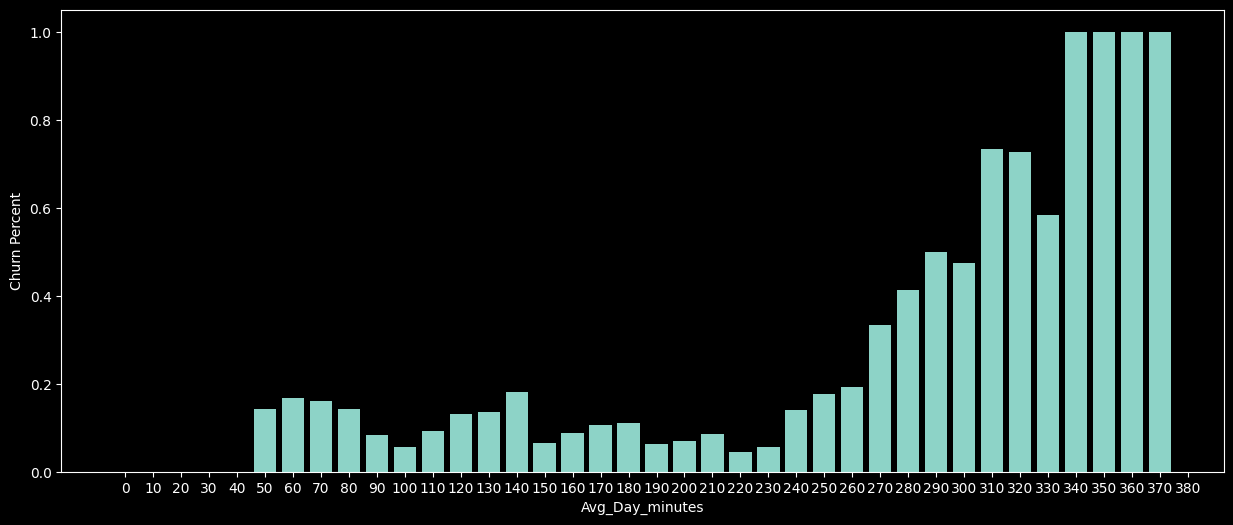

In [ ]:
l=[]
for i in range(0,390,10):
    l.append(td[td.Avg_Day_Minutes>i][td.Avg_Day_Minutes<i+10].Churn.mean())
plt.figure(figsize=(15,6))
plt.bar(np.arange(0,390,10), l, width=8)
plt.xticks(np.arange(0,390,10))
plt.ylabel('Churn Percent')
plt.xlabel('Avg_Day_minutes')

People with more number of time spent on calls during daytime also churn more.

# Churn % vs Areacode

Text(0, 0.5, 'Churn Percent')

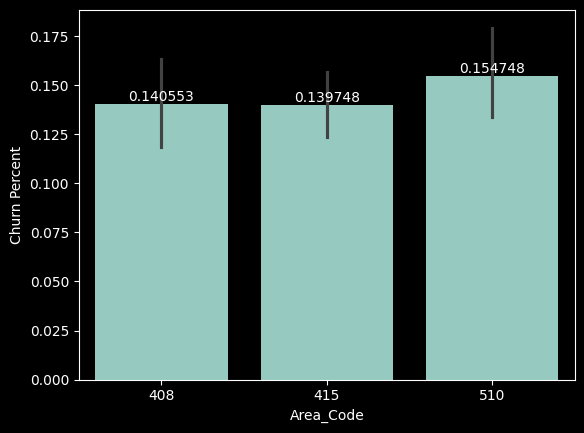

In [ ]:
ax=sns.barplot(x='Area_Code',y='Churn',data=td,estimator='mean',linewidth=0)
ax.bar_label(ax.containers[0])
plt.ylabel('Churn Percent')

In the area code 510 chrun % is a little higher indicating dissatisfaction of customers in that area code

# Investigating intl plan

In [ ]:
tscp=td.groupby('State_Code').apply(lambda group: pd.Series({
    'churn_percent': group['Churn'].mean(),
    'int' : group['Intl_Plan'].mean()
})).reset_index()
tscp[tscp.churn_percent>0.2]

,State_Code,churn_percent,int
4,CA,0.264706,0.088235
14,IL,0.222222,0.111111
15,IN,0.212121,0.121212
25,MS,0.223881,0.089552
34,NY,0.303797,0.101266
39,RI,0.243590,0.166667
42,TN,0.203125,0.031250
44,UT,0.215909,0.079545


[Text(0, 0, '0.113593'), Text(0, 0, '0.426426')]

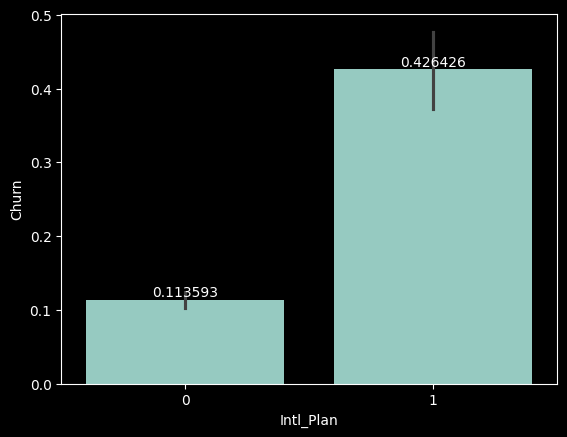

In [ ]:
ax=sns.barplot(x="Intl_Plan",y="Churn",data=td)
ax.bar_label(ax.containers[0])

Clearly company's intl plan has a problem because the Churn % of the ones with the intl plan is very high

# Analysing per minute charges of day, evening and night

In [ ]:
tac=td.groupby('Churn').apply(lambda group: pd.Series({
    'avg_day_charge': group['Avg_Day_Charge'].mean(),
    'avg_night_charge': group['Avg_Night_Charge'].mean(),
    'avg_eve_charge': group['Avg_Eve_Charge'].mean(),
    'tms':(group['Avg_Day_Charge']+group['Avg_Night_Charge']+group['Avg_Eve_Charge']).mean()
})).reset_index()
tac

,Churn,avg_day_charge,avg_night_charge,avg_eve_charge,tms
0,0,35.021516,10.114668,24.863486,69.999670
1,1,42.091627,10.445100,26.156827,78.693554


Text(0, 0.5, 'Avg charge per min')

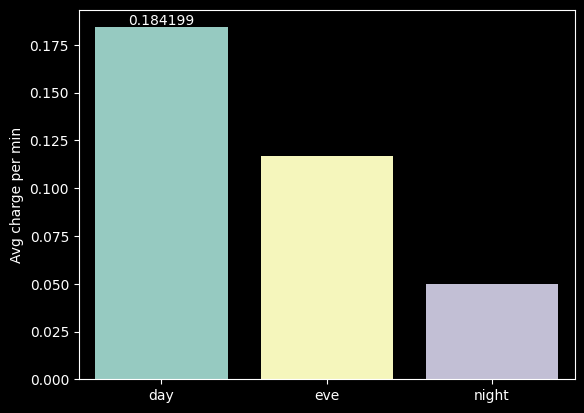

In [ ]:
df = pd.DataFrame({
    'day': (td['Avg_Day_Charge'].sum() / td['Avg_Day_Minutes'].sum()),
    'eve': (td['Avg_Eve_Charge'].sum()/ td['Avg_Eve_Minutes'].sum()),
    'night': (td['Avg_Night_Charge'].sum() / td['Avg_Night_Minutes'].sum())
},index=td.index)
df=df.head(1)
ax=sns.barplot(data=df)
ax.bar_label(ax.containers[0])
plt.ylabel('Avg charge per min')


Average Money Spent per Minute differs highly based on the time of the day. Therefore company might consider evening the charges across the day.

In [ ]:
df = pd.DataFrame({
    'churn':[0,1],
    'avgdaypermin': [(tnc['Avg_Day_Charge'].sum() / tnc['Avg_Day_Minutes'].sum()),(tc['Avg_Day_Charge'].sum() / tc['Avg_Day_Minutes'].sum()),],
    'avgevepermin': [(tnc['Avg_Eve_Charge'].sum()/ tnc['Avg_Eve_Minutes'].sum()),(tc['Avg_Eve_Charge'].sum()/ tc['Avg_Eve_Minutes'].sum()),],
    'avgnightpermin': [(tnc['Avg_Night_Charge'].sum() / tnc['Avg_Night_Minutes'].sum()),(tc['Avg_Night_Charge'].sum() / tc['Avg_Night_Minutes'].sum()),]
})
df

,churn,avgdaypermin,avgevepermin,avgnightpermin
0,0,0.184199,0.116887,0.050015
1,1,0.184197,0.116886,0.050015


These values doesn't differ much, which shows that the avg charge per minute doesnt affect the churn rate.


In [ ]:
tcint=tint.groupby('Churn').apply(lambda group: pd.Series({
    'int' : group['Avg_Intl_Charge'].mean(),
    'intcall' : group['Avg_Intl_Calls'].mean(),
})).reset_index()
tcint

,Churn,int,intcall
0,0,2.921885,5.413613
1,1,3.410493,4.295775


people with more intl calls tend to stay.

## Customer Service Calls vs Churn

[Text(0, 0, '1.45605'), Text(0, 0, '2.26104')]

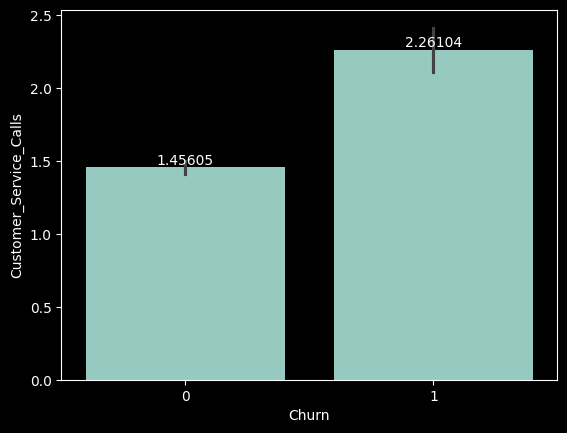

In [ ]:
ax=sns.barplot(y='Customer_Service_Calls',x='Churn',data=td)
ax.bar_label(ax.containers[0])

People recieving a higher number of customer service calls tend to leave.

## Total Money Spent vs Churn

[Text(0, 0, '69.9997'), Text(0, 0, '78.6936')]

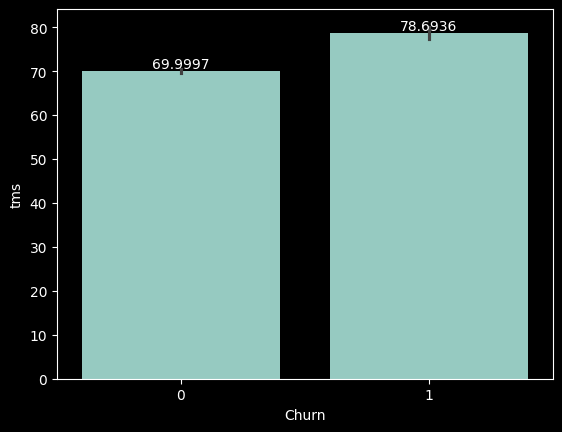

In [ ]:
ax=sns.barplot(y='tms',x='Churn',data=td)
ax.bar_label(ax.containers[0])

people who spend more tend to churn.

## Area Code wise Analysis

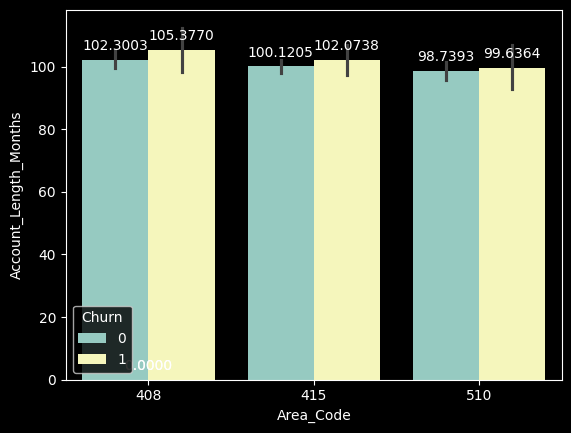

In [ ]:
ax=sns.barplot(x='Area_Code', y='Account_Length_Months',hue='Churn', data=td)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

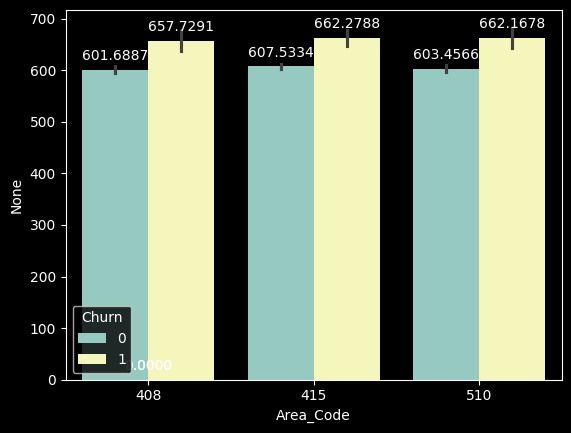

In [ ]:
total_mins = td.Avg_Day_Minutes + td.Avg_Eve_Minutes + td.Avg_Night_Minutes
ax=sns.barplot(x='Area_Code', y=total_mins,hue='Churn', data=td)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

even area code wise similar trend is observed

In [ ]:
g=pd.DataFrame({
    'Area_Code':td.Area_Code.unique(),
    'Avg_Day_Minutes':[td[td.Area_Code==510].Avg_Day_Minutes.mean(),td[td.Area_Code==415].Avg_Day_Minutes.mean(),
                       td[td.Area_Code==408].Avg_Day_Minutes.mean()],
    'Avg_Eve_Minutes':[td[td.Area_Code==510].Avg_Eve_Minutes.mean(),td[td.Area_Code==415].Avg_Eve_Minutes.mean(),
                       td[td.Area_Code==408].Avg_Eve_Minutes.mean()],
    'Avg_Night_Minutes':[td[td.Area_Code==510].Avg_Night_Minutes.mean(),td[td.Area_Code==415].Avg_Night_Minutes.mean(),
                         td[td.Area_Code==408].Avg_Night_Minutes.mean()]
})
g.set_index('Area_Code',inplace=True)
g

,Avg_Day_Minutes,Avg_Eve_Minutes,Avg_Night_Minutes
Area_Code,,,
510,194.977608,213.313564,204.250891
415,197.626426,214.052016,203.505556
408,192.304954,215.783491,201.476866


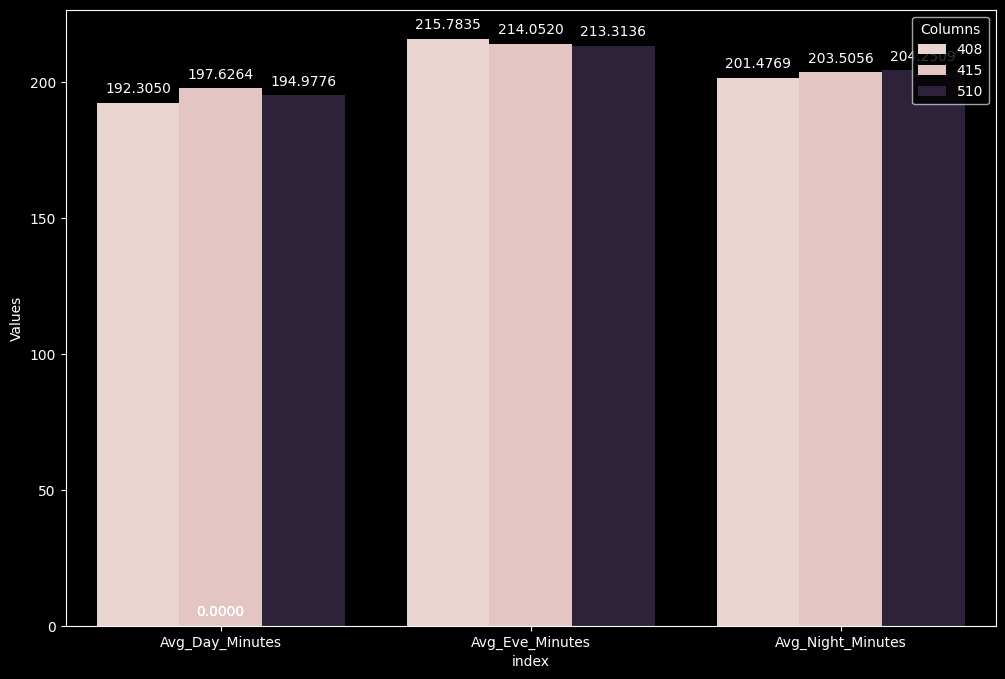

In [ ]:
plt.figure(figsize=(12,8))
melted_df = g.transpose().reset_index().melt(id_vars='index', var_name='Columns', value_name='Values')
ax=sns.barplot(x='index', y='Values', hue='Columns', data=melted_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

No conclusion can be drawn from this analysis

## State Code wise Analysis

In [ ]:
s=td.groupby(td.State_Code).mean()
s.head()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,Avg_Day_Minutes,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn,total_mins,tms
State_Code,,,,,,,,,,,,,,,,,,
AK,98.979167,451.145833,0.062500,0.291667,187.276667,34.496875,221.449375,25.884375,202.690000,103.395833,10.137292,10.836875,4.687500,2.828125,1.583333,0.125000,611.416042,70.518542
AL,99.709302,434.523256,0.069767,0.255814,202.576047,37.314070,202.432558,23.662093,199.178372,106.325581,9.961860,12.330698,5.174419,3.217791,1.767442,0.116279,604.186977,70.938023
AR,95.278689,440.098361,0.032787,0.278689,181.890820,33.505082,215.332623,25.167869,198.881311,107.557377,9.946393,11.168852,4.737705,2.915246,1.573770,0.196721,596.104754,68.619344
AZ,99.372881,435.644068,0.067797,0.237288,195.190169,35.953220,210.602542,24.615254,208.394576,106.694915,10.423390,11.907627,5.474576,3.106610,1.423729,0.050847,614.187288,70.991864
CA,98.205882,438.088235,0.088235,0.176471,184.765882,34.034706,206.379706,24.122647,198.389118,100.705882,9.922647,10.749412,5.205882,2.804706,1.205882,0.264706,589.534706,68.080000


In [ ]:
s.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,Avg_Day_Minutes,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn,total_mins,tms
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,100.703311,436.753001,0.096420,0.264088,195.153017,35.946915,214.575969,25.081063,203.343786,105.226673,10.170266,11.769557,4.828678,3.071232,1.566576,0.143011,613.072772,71.198244
std,4.203981,5.476806,0.037419,0.052406,7.872257,1.449974,6.276096,0.733532,6.496175,2.472780,0.324852,0.411762,0.341540,0.107478,0.162149,0.056489,12.784822,1.688617
min,92.882353,427.686747,0.019608,0.176471,180.479107,33.243036,202.432558,23.662093,189.406548,98.483333,9.472619,10.749412,4.016667,2.804706,1.205882,0.050633,589.534706,67.847143
25%,98.167325,433.387500,0.069767,0.230107,189.936875,34.985156,210.461835,24.599529,199.004318,103.869318,9.953197,11.467397,4.611264,2.992519,1.450352,0.113212,604.339545,69.869319
50%,100.727273,435.971429,0.092308,0.262500,195.043662,35.926479,214.373333,25.058413,203.899367,105.421687,10.197975,11.734464,4.848485,3.061964,1.582090,0.132353,614.131875,71.360581
75%,103.197737,439.755639,0.123904,0.292892,200.856630,36.997222,218.807783,25.575881,207.621119,107.045850,10.384095,12.121481,5.113369,3.162889,1.699206,0.179563,623.026355,72.353733
max,116.533333,451.145833,0.187500,0.410714,210.834384,38.835479,226.823788,26.512727,218.754333,110.345238,10.941500,12.418125,5.474576,3.240625,1.853333,0.303797,638.828904,74.847397


<Axes: xlabel='State_Code', ylabel='Churn'>

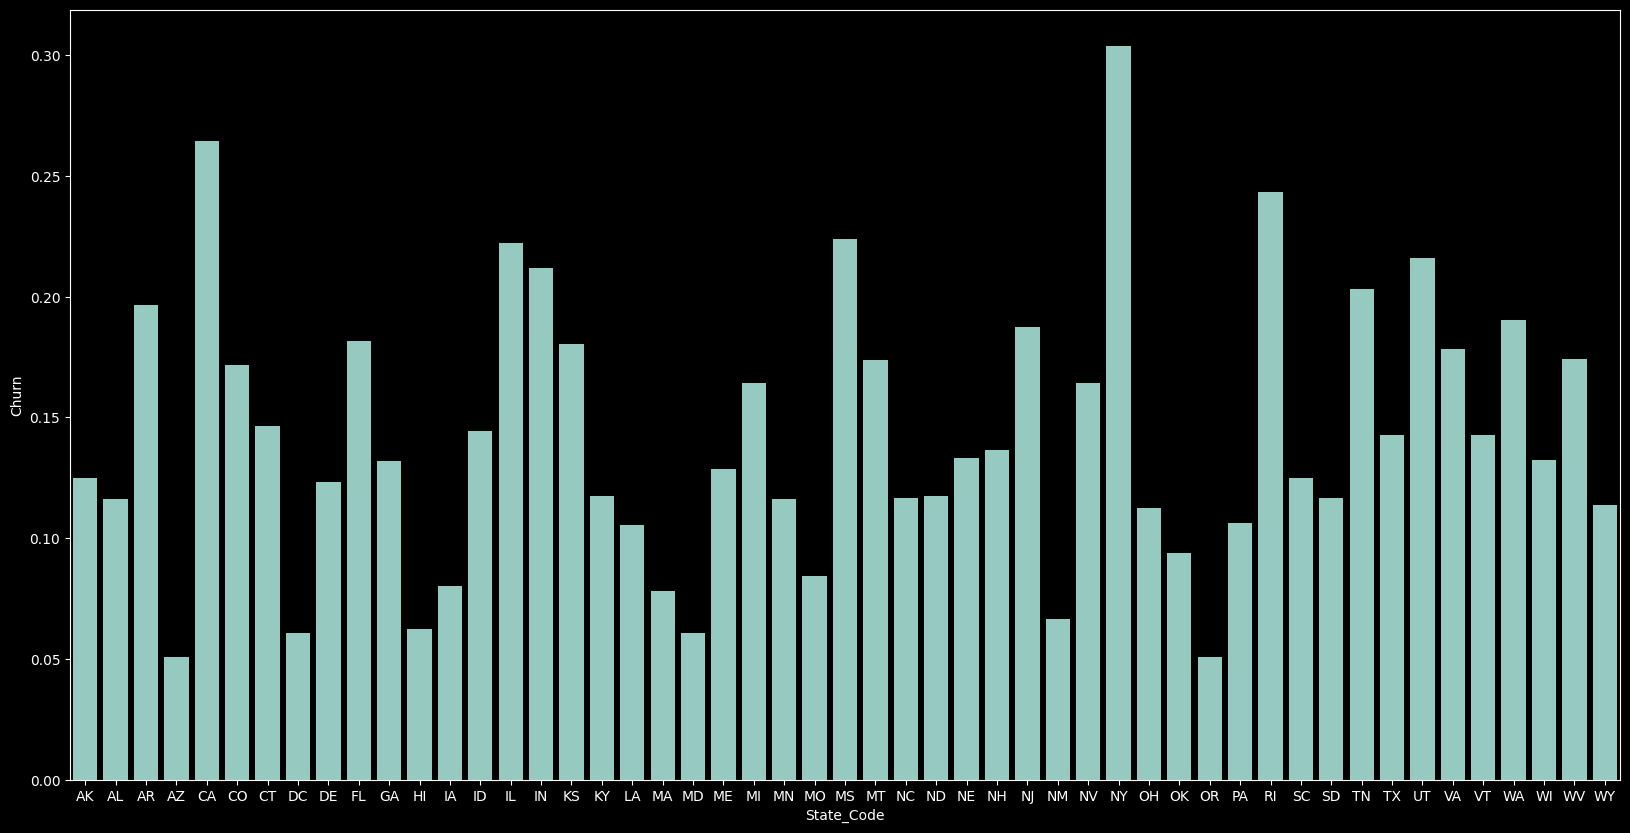

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=s.index, y=s.Churn, data=s)

NY has highest churn rate.

OR has lowest churn rate.

<Axes: xlabel='State_Code', ylabel='Account_Length_Months'>

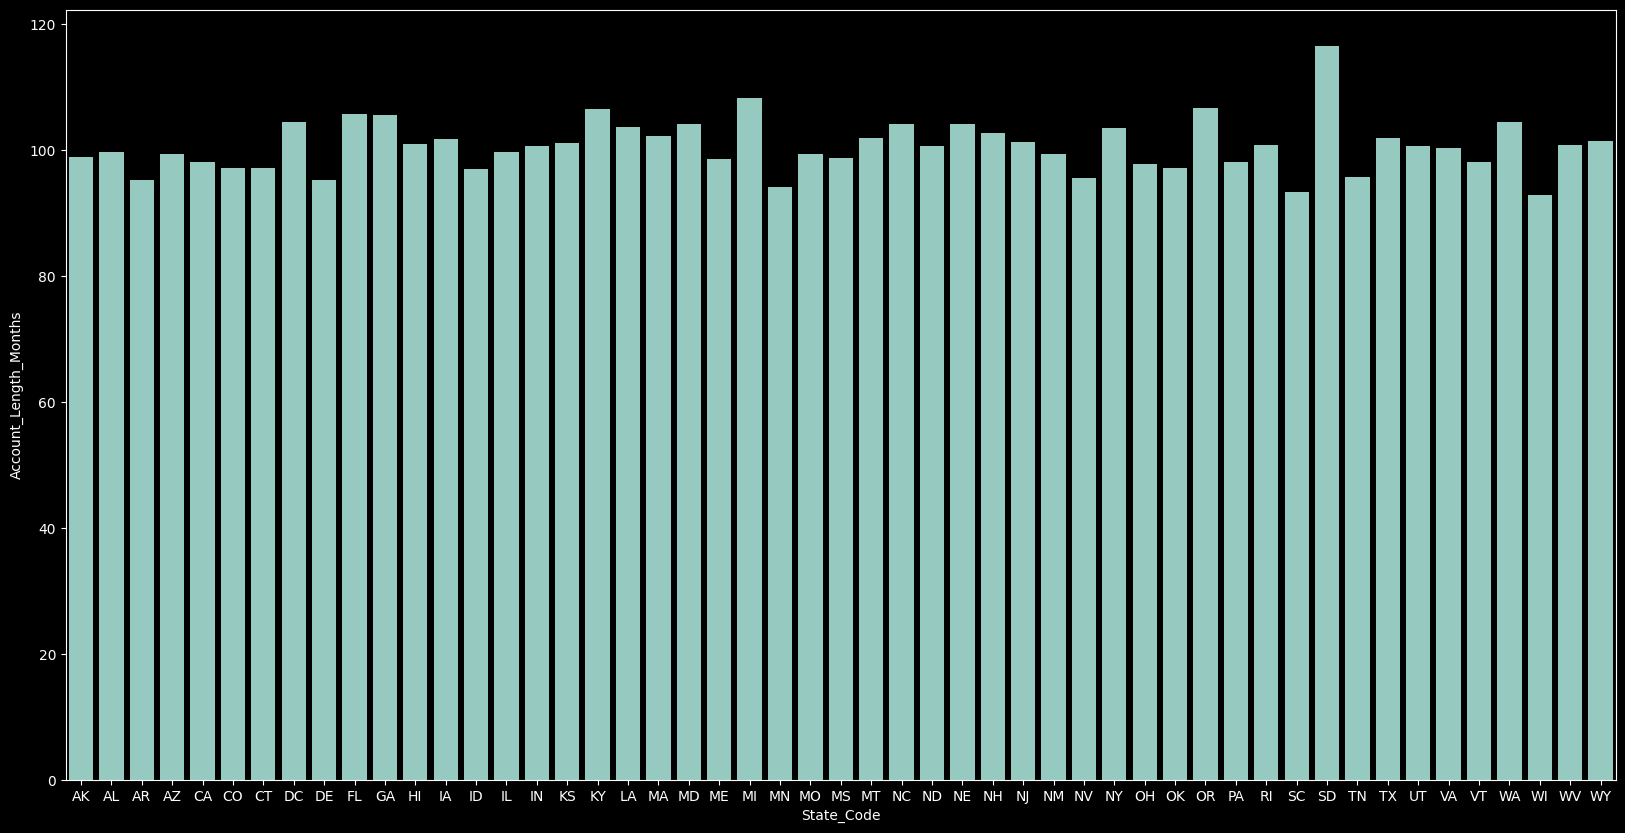

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=s.index, y=s.Account_Length_Months, data=s)

In [ ]:
shc=s[s.Churn>=0.2]  #States with high Churn
shc.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,Avg_Day_Minutes,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn,total_mins,tms
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,99.807104,437.314736,0.098605,0.220221,199.966711,36.833609,212.175209,24.800729,201.485341,104.921651,10.077167,11.756529,4.918795,3.067959,1.599718,0.236169,613.627261,71.711506
std,2.290017,3.056522,0.038538,0.047411,9.418856,1.734875,4.763912,0.556912,4.086601,2.539567,0.204034,0.560594,0.255367,0.146492,0.183269,0.033529,11.809342,1.802682
min,95.812500,431.522727,0.031250,0.176471,184.765882,34.034706,206.379706,24.122647,195.151045,100.705882,9.761194,10.749412,4.420455,2.804706,1.205882,0.203125,589.534706,68.080000
25%,98.678336,436.134033,0.086063,0.179392,195.288494,35.971637,207.307445,24.231767,198.280247,103.598214,9.917156,11.546798,4.838287,3.012827,1.586825,0.214962,610.547113,71.218896
50%,100.178752,437.816270,0.095409,0.215639,200.213797,36.879085,213.426837,24.947161,202.124228,105.238478,10.108705,11.847302,4.921131,3.091725,1.661222,0.223051,614.854729,72.005663
75%,100.773019,438.620291,0.113636,0.240986,207.412674,38.205356,215.433515,25.181626,204.548936,106.594754,10.230623,12.206415,5.040277,3.186010,1.698288,0.248869,619.572302,72.565662
max,103.607595,441.671875,0.166667,0.312500,210.806076,38.830127,217.890469,25.468281,206.889091,108.170455,10.347273,12.355625,5.240506,3.224375,1.777778,0.303797,629.680159,74.078095


<Axes: xlabel='State_Code', ylabel='Churn'>

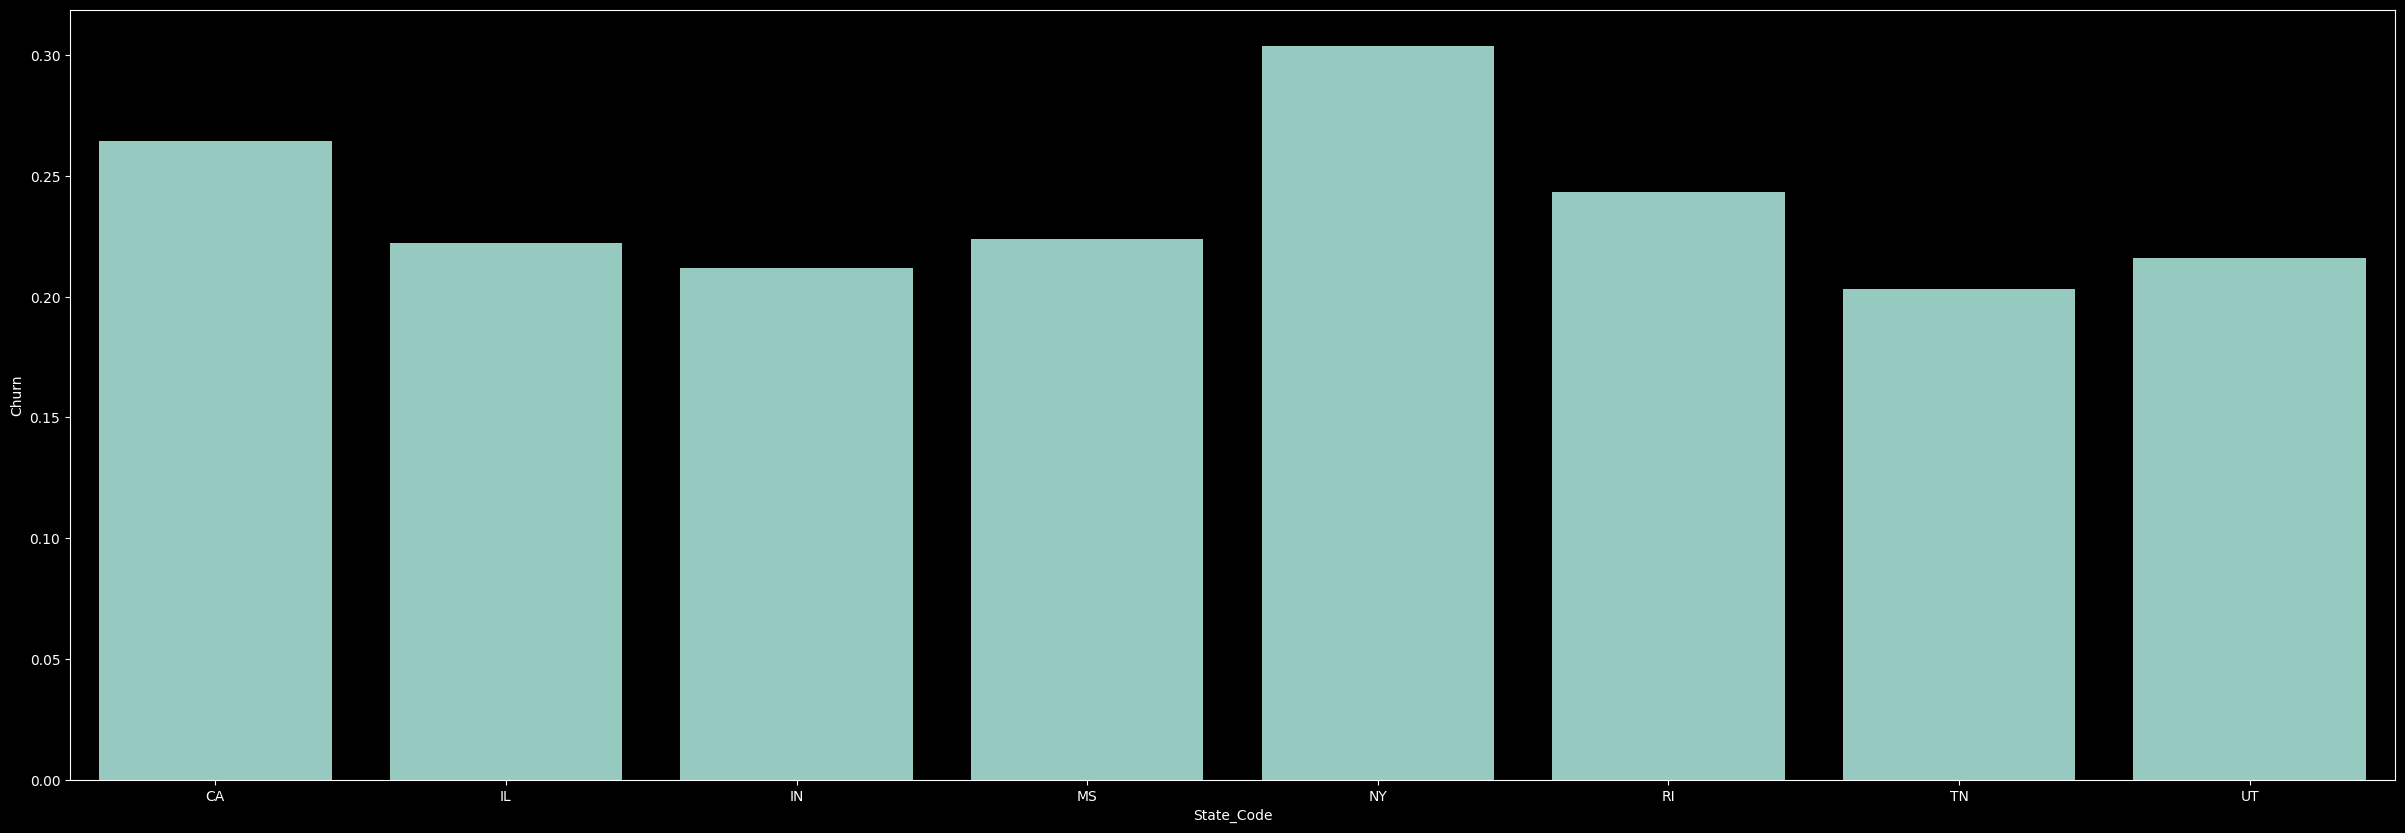

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x=shc.index,y=shc.Churn, data=shc)

<Axes: xlabel='State_Code', ylabel='Intl_Plan'>

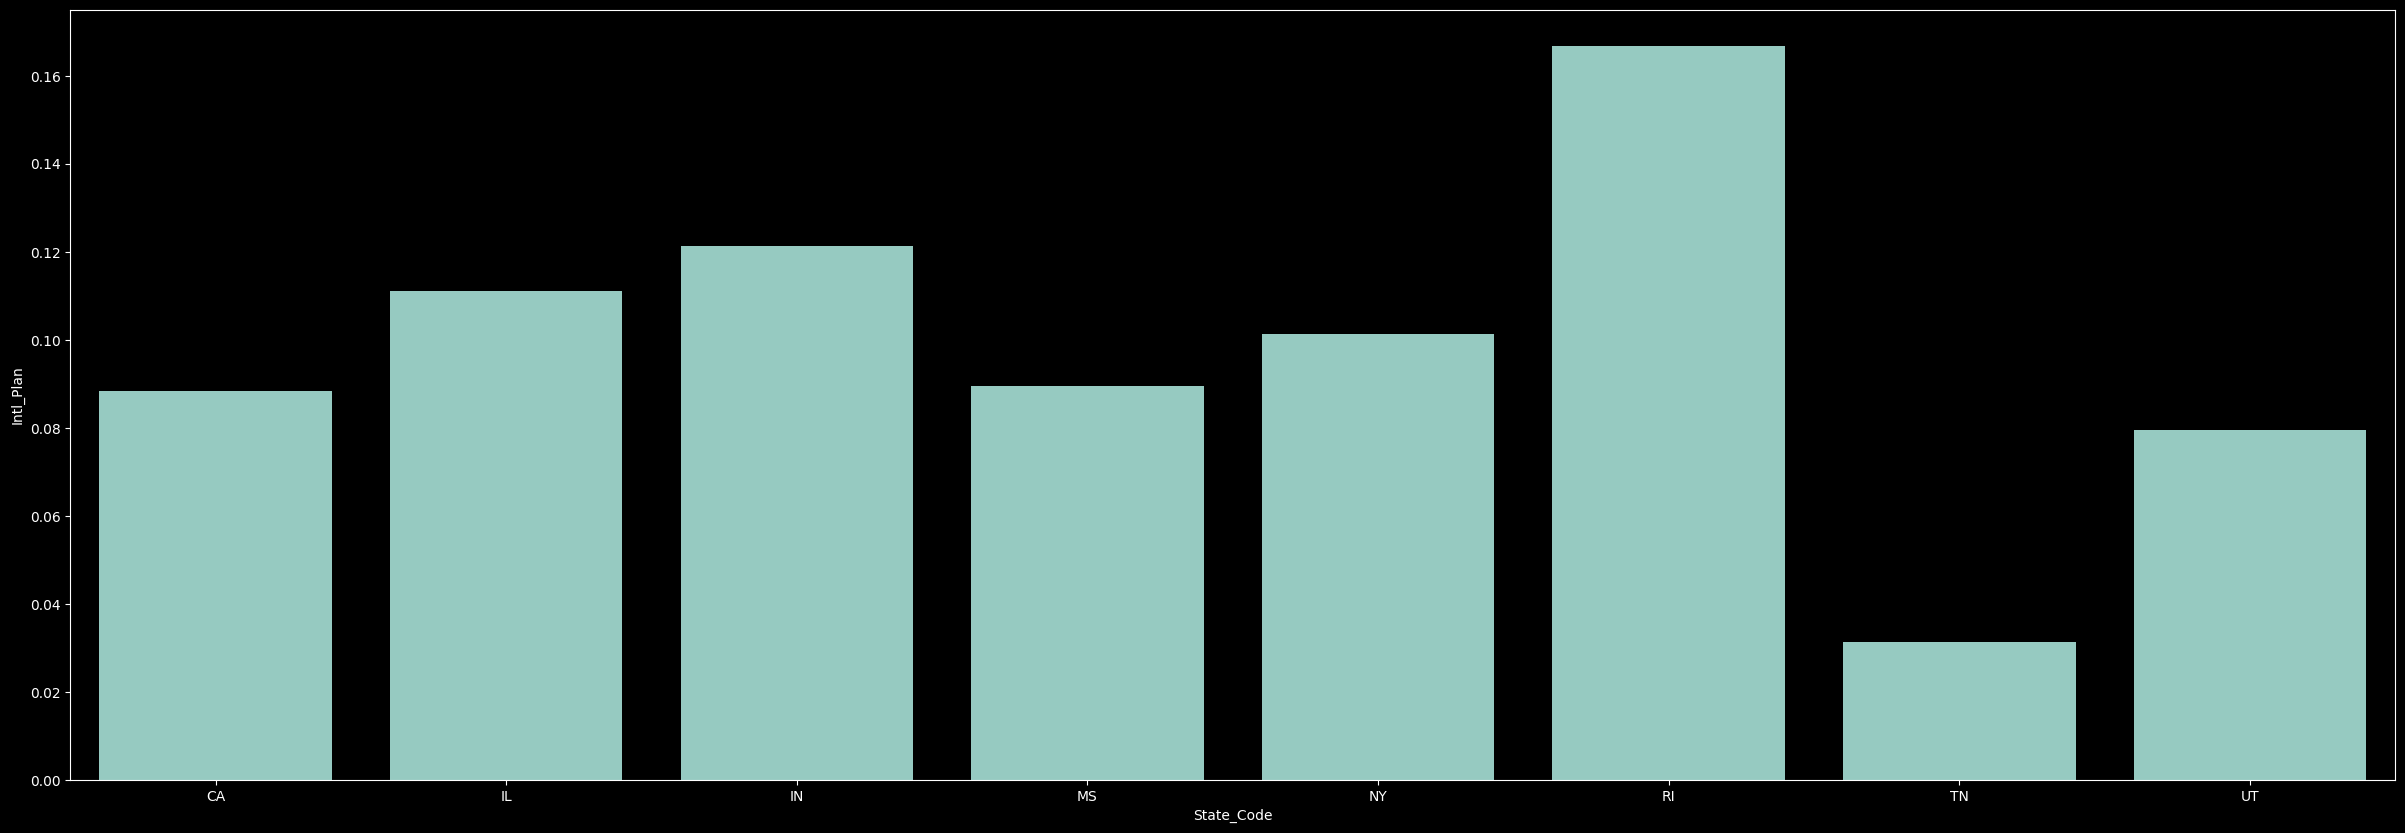

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x=shc.index,y=shc.Intl_Plan, data=shc)

## NY(Highest churn %) comparison with OR(lowest churn %)

In [ ]:
td['tms'] = td.Avg_Day_Charge + td.Avg_Eve_Charge + td.Avg_Night_Charge
NY=td[td.State_Code=='NY']
OR=td[td.State_Code=='OR']

In [ ]:
NY.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,Avg_Day_Minutes,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn,total_mins,tms
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,103.607595,437.544304,0.101266,0.240506,210.806076,38.830127,207.575696,24.262911,200.553924,105.797468,10.030380,12.217089,5.240506,3.187848,1.696203,0.303797,618.935696,73.123418
std,37.410892,42.544335,0.303608,0.430122,64.291298,11.842226,54.365356,6.354400,50.098472,23.573333,2.505371,2.782696,2.856460,0.726039,1.470692,0.462835,103.746965,14.704547
min,16.000000,408.000000,0.000000,0.000000,52.320000,9.640000,94.620000,11.070000,58.230000,44.000000,2.920000,4.720000,1.000000,1.230000,0.000000,0.000000,358.060000,34.930000
25%,77.000000,415.000000,0.000000,0.000000,170.215000,31.350000,165.175000,19.300000,168.760000,88.000000,8.440000,10.180000,3.000000,2.655000,1.000000,0.000000,548.185000,63.950000
50%,107.000000,415.000000,0.000000,0.000000,207.240000,38.170000,205.410000,24.000000,199.800000,109.000000,9.990000,12.420000,4.000000,3.240000,2.000000,0.000000,620.560000,72.650000
75%,130.000000,462.500000,0.000000,0.000000,250.325000,46.110000,241.950000,28.285000,234.480000,123.000000,11.730000,14.030000,7.000000,3.660000,2.000000,1.000000,697.675000,83.280000
max,197.000000,510.000000,1.000000,1.000000,380.000000,70.000000,322.530000,37.710000,313.010000,164.000000,15.660000,18.060000,12.000000,4.710000,9.000000,1.000000,880.880000,109.870000


In [ ]:
OR.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,Avg_Day_Minutes,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn,total_mins,tms
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,106.670886,432.645570,0.088608,0.177215,191.366456,35.249241,213.774177,24.987595,203.899367,103.417722,10.197975,12.027342,4.886076,3.138354,1.379747,0.050633,609.040000,70.434810
std,40.336317,39.334867,0.285992,0.384291,54.675238,10.070368,53.711696,6.278081,55.269602,20.869317,2.764223,3.200076,2.754890,0.834943,1.029112,0.220648,94.963104,11.686406
min,10.000000,408.000000,0.000000,0.000000,48.540000,8.940000,57.010000,6.660000,54.680000,38.000000,2.730000,0.000000,0.000000,0.000000,0.000000,0.000000,362.660000,34.280000
25%,80.500000,415.000000,0.000000,0.000000,152.435000,28.080000,180.875000,21.140000,166.735000,89.000000,8.340000,10.520000,3.000000,2.745000,1.000000,0.000000,552.665000,62.440000
50%,106.000000,415.000000,0.000000,0.000000,188.320000,34.680000,217.520000,25.430000,206.380000,105.000000,10.320000,12.190000,4.000000,3.180000,1.000000,0.000000,610.030000,72.310000
75%,136.000000,415.000000,0.000000,0.000000,230.000000,42.370000,247.795000,28.970000,234.080000,116.500000,11.710000,14.380000,7.000000,3.760000,2.000000,0.000000,680.840000,79.600000
max,182.000000,510.000000,1.000000,1.000000,318.160000,58.600000,335.820000,39.250000,400.000000,148.000000,20.000000,18.520000,14.000000,4.830000,5.000000,1.000000,782.770000,90.590000


Text(0.5, 1.0, 'OR')

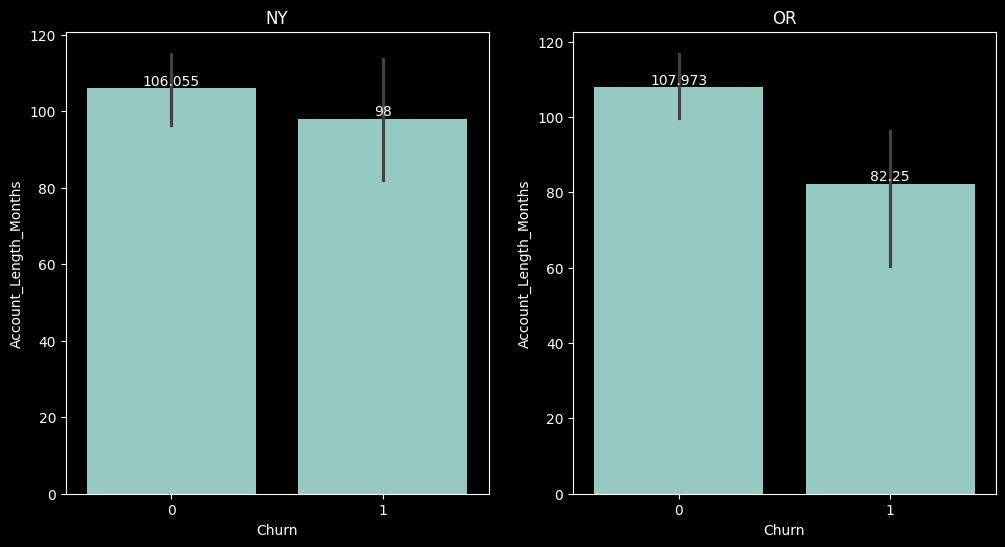

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ax=sns.barplot(x=NY.Churn, y=NY.Account_Length_Months, data=NY)
ax.bar_label(ax.containers[0])
plt.title('NY')

plt.subplot(1,2,2)
ax=sns.barplot(x=OR.Churn, y=OR.Account_Length_Months, data=OR)
ax.bar_label(ax.containers[0])
plt.title('OR')

This infer that people with less account length churn more easily in some states

Text(0.5, 1.0, 'OR')

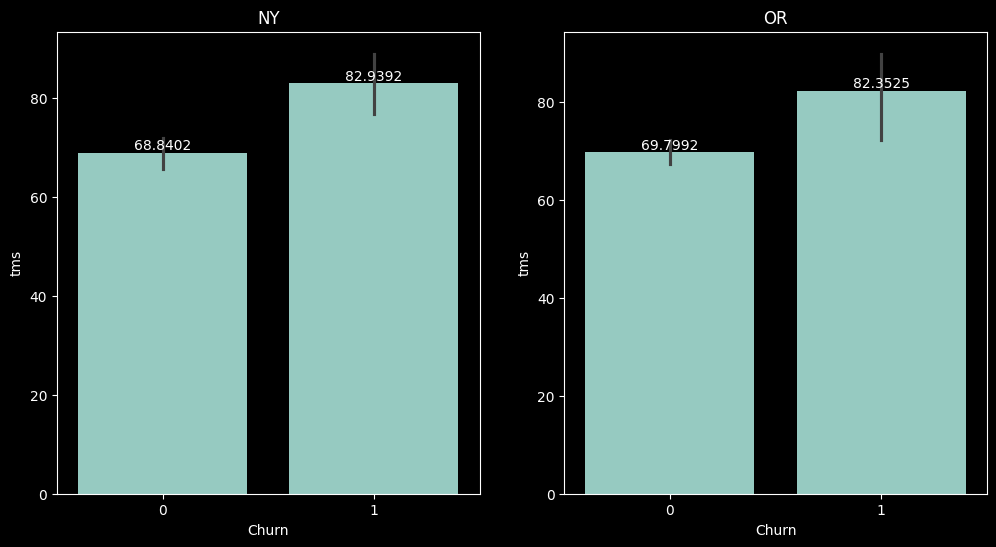

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ax=sns.barplot(x=NY.Churn, y=NY.tms, data=NY)
ax.bar_label(ax.containers[0])
plt.title('NY')

plt.subplot(1,2,2)
ax=sns.barplot(x=OR.Churn, y=OR.tms, data=OR)
ax.bar_label(ax.containers[0])
plt.title('OR')

both of the states show similar trend which matches with the trend we found across the whole data set

Text(0.5, 1.0, 'OR')

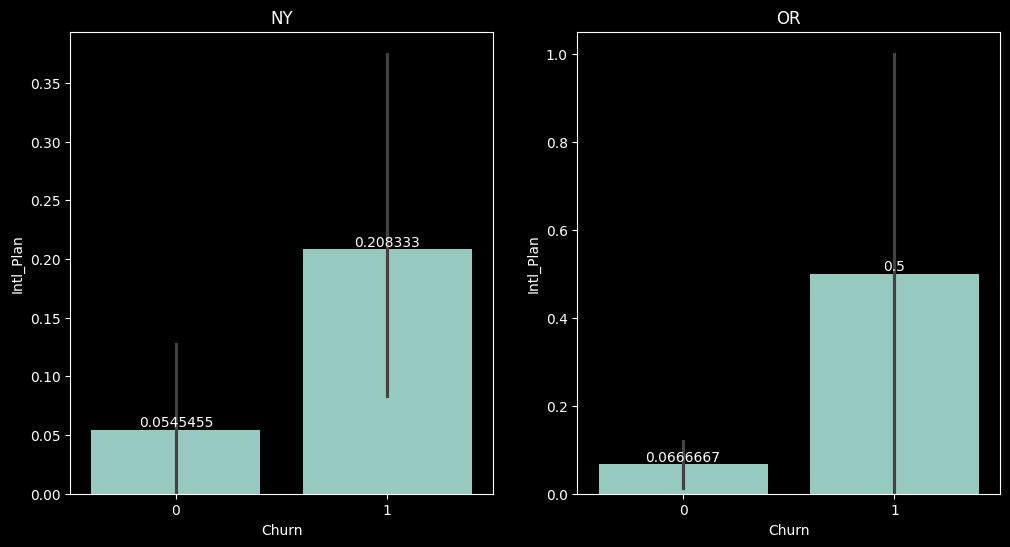

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ax=sns.barplot(x=NY.Churn, y=NY.Intl_Plan, data=NY)
ax.bar_label(ax.containers[0])
plt.title('NY')

plt.subplot(1,2,2)
ax=sns.barplot(x=OR.Churn, y=OR.Intl_Plan, data=OR)
ax.bar_label(ax.containers[0])
plt.title('OR')


NY follows the general trend considering churn percentages
while people in OR with Intl_Plan have a higher churn rate despite being the state with lowest churn percent


Text(0.5, 1.0, 'OR')

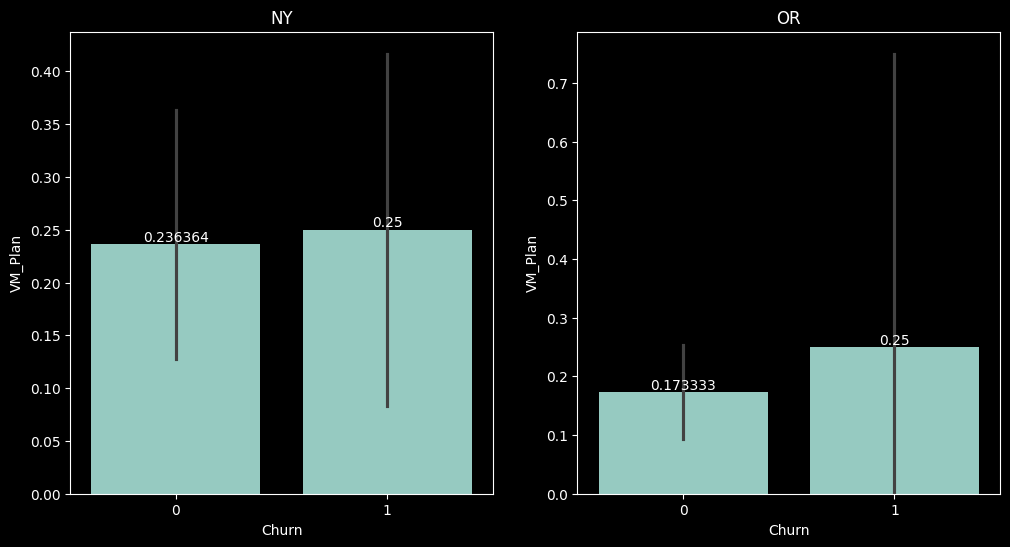

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ax=sns.barplot(x=NY.Churn, y=NY.VM_Plan, data=NY)
ax.bar_label(ax.containers[0])
plt.title('NY')

plt.subplot(1,2,2)
ax=sns.barplot(x=OR.Churn, y=OR.VM_Plan, data=OR)
ax.bar_label(ax.containers[0])
plt.title('OR')

these graphs are quite contradicting to our analysis yet as the people not churning have count of vm_plan similar or less than to the people churning while previously analysis indicated the opposite

Text(0.5, 1.0, 'OR')

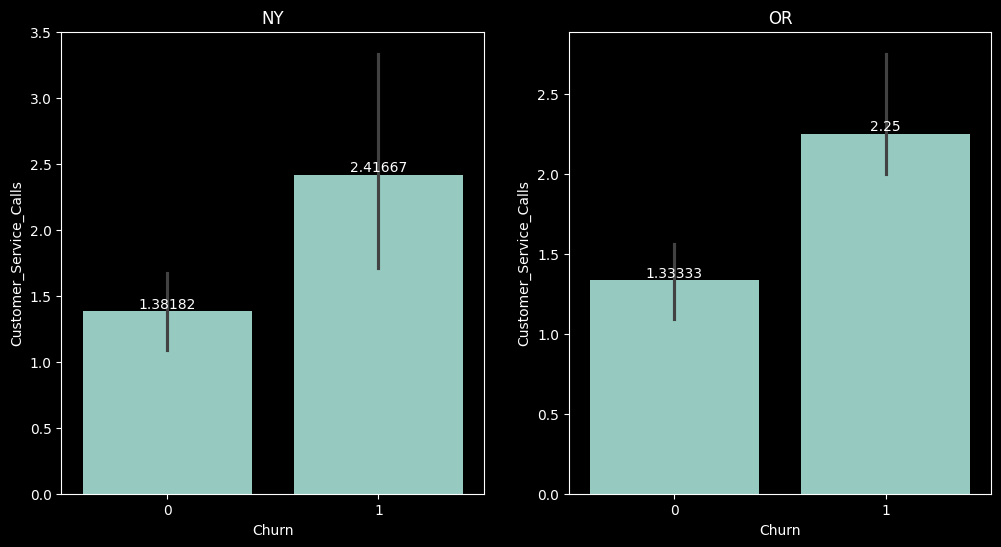

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ax=sns.barplot(x=NY.Churn, y=NY.Customer_Service_Calls, data=NY)
ax.bar_label(ax.containers[0])
plt.title('NY')

plt.subplot(1,2,2)
ax=sns.barplot(x=OR.Churn, y=OR.Customer_Service_Calls, data=OR)
ax.bar_label(ax.containers[0])
plt.title('OR')

both of the states show similar trend which matches with the trend we found across the whole data set

